# L’objectif de ce projet est de prédire la qualité d’un vin en se basant sur différentes mesures.

# Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Importation du dataset et Affichage de ce dernier

In [2]:
df = pd.read_csv("winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Nos données sont au format CSV (similaire à Excel). C’est un fichier de données divisé en lignes et en colonnes.

# Tout d’abord, affichons le type de données pour chaque colonne :

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Affichons maintenant un aperçu de nos données.

# Pour cela on utilise la fonction head() qui affiche la tête du dataset, les premiers lignes.

In [6]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# Première Étape : Exploratory Data Analysis

# Première Étape : Exploratory Data Analysis
# L’Exploratory Data Analysis est la phase d’analyse technique d’un dataset. Cela permet aux Data Scientists et aux Machine Learning Engineers de mieux comprendre leurs données. Mais surtout cela va les aider à déterminer le modèle de Machine Learning dont ils ont besoin pour résoudre leurs tâches.

# Analyse Univariée
# L’Analyse Univariée est le fait d’inspecter chaque feature séparément.

# Cela va nous permettre d’approfondir notre connaissance sur le dataset.

# On est ici en phase de compréhension.

#  La question associée à l’Analyse Univariée est : Quelles sont les données qui composent notre dataset ?


# Tout d’abord analysons les données les plus importantes à nos yeux, les données cible ou target : la colonne quality.


# Quand on a affiché le type de la colonne cible tout à l’heure, on a pu remarquer qu’elle était composée de nombre entier.


# Cela peut indiquer deux choses :


# soit nous avons un potentiel infini de nombre entier, de 0 à l’infini

# soit notre espace de possibilité est restreint, par exemple de 0 à 5

# Pour tirer tout cela au clair, on va prendre nos données quality et afficher les valeurs uniques (Si l’on a 50 lignes avec une qualité de 8, on aura un seul 8).


# Si on obtient une liste très grande, alors on peut considérer que le potentiel est infini mais si on obtient une liste restreinte, cela indique nécessairement que l’espace est restreint.

In [11]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

# Nous avons une liste sept chiffres compris entre 3 et 9. Notre espace est donc restreint.

# C’est une information importante pour faire du Machine Learning. Vu qu’on a un potentiel restreint, on utilisera un modèle de Machine Learning de classification. Sinon on aurait utilisé un modèle de regression.

# Ce potentiel restreint nous indique qu’on peut analyser ces données comme des variables catégoriques

# Les Données Catégoriques sont des données qui peuvent être regroupées dans des sous-parties (des catégories) spécifiques.

# Ici, on peut, par exemple, parler des vins de qualité 3. C’est une catégorie de notre dataset.

# On n’aurait pas pu faire de même avec la colonnes chlorides qui est composé de float.

# Distribution
# Passons maintenant à l’analyse visuelle !

# Importons les deux librairies principales pour tracer des graphiques :

# matplotlib
# seaborn

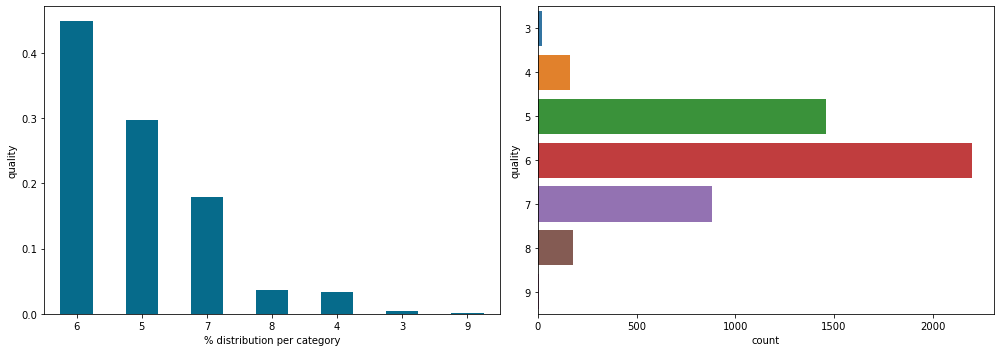

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
df['quality'].value_counts(normalize=True).plot.bar(rot=0, color='#066b8b')
plt.ylabel('quality')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
sns.countplot(data=df,y='quality')
plt.tight_layout()
plt.show() 

# Sur les deux graphiques on voit la même distribution ce qui est normal.

# Tout d’abord, on remarque que les vins de qualité 6 sont les vins les plus représentés dans notre dataset. À gauche, on peut voir qu’il représentent plus de 40% de notre dataset (on s’approche des 50%) et à droite que cela représente environ 2500 lignes (donc 2500 vins).

# Plus généralement, on peut remarquer une chose à notre défaveur : le dataset n’est pas également distribué.

# Cette inégalité peut influer sur les performances de notre modèle de Machine Learning.

# Effectivement, il y a tellement peu de vin de qualité 9 que le modèle ne pourra pas bien analyser les caractéristiques qui le différentie des autres

# Mais d’un autre côté la disparité dans la distribution d’un dataset est quelque chose de normal qui arrive fréquemment dans les projets du monde réel. C’est un inconvénient avec lequel le Data Scientist / Machine Learning Engineer doit savoir jouer.

# Features – Données Numériques
# Distribution et Boîte de Tukey
# Analysons maintenant les caractéristiques des vins (aussi appelées features). Ce sont les données qui permettront au modèle de Machine Learning de détecter la qualité des vins.

# Tout d’abord, on peut créer un sous DataFrame contenant uniquement nos features :

# Maintenant analysons la colonne alcohol qui représente le degré d’alcool du vin.

# On affiche ici la distribution sur graphique classique et sur graphique à boîte de Tukey :

In [17]:
df_features = df.drop(columns='quality')

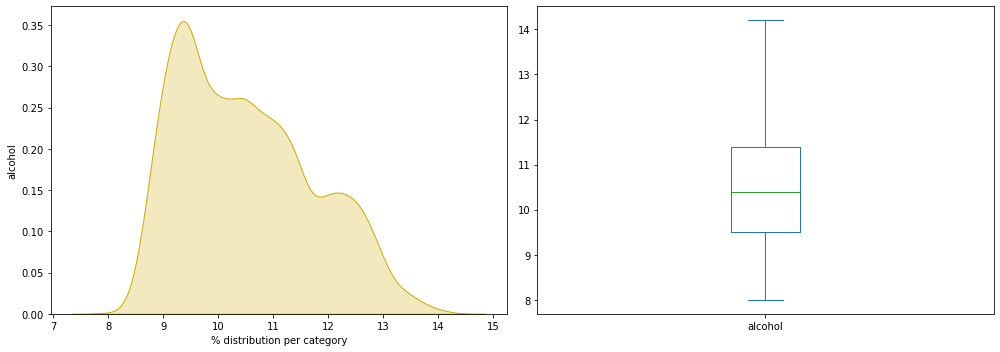

In [18]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(df_features['alcohol'],shade=True,color='#d1aa00')
plt.ylabel('alcohol')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
df_features['alcohol'].plot.box()
plt.tight_layout()
plt.show()

# On veut repérer s’il y a une quelconque anormalité sur notre graphique :

# distribution inhabituelle
# données manquantes
# individu particulièrement éloigné de la moyenne
# Le graphique semble tout à fait normal à l’inverse des données analysées dans notre projet sur le feux de forêts.

In [20]:
num_columns = df_features.columns.tolist()
num_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

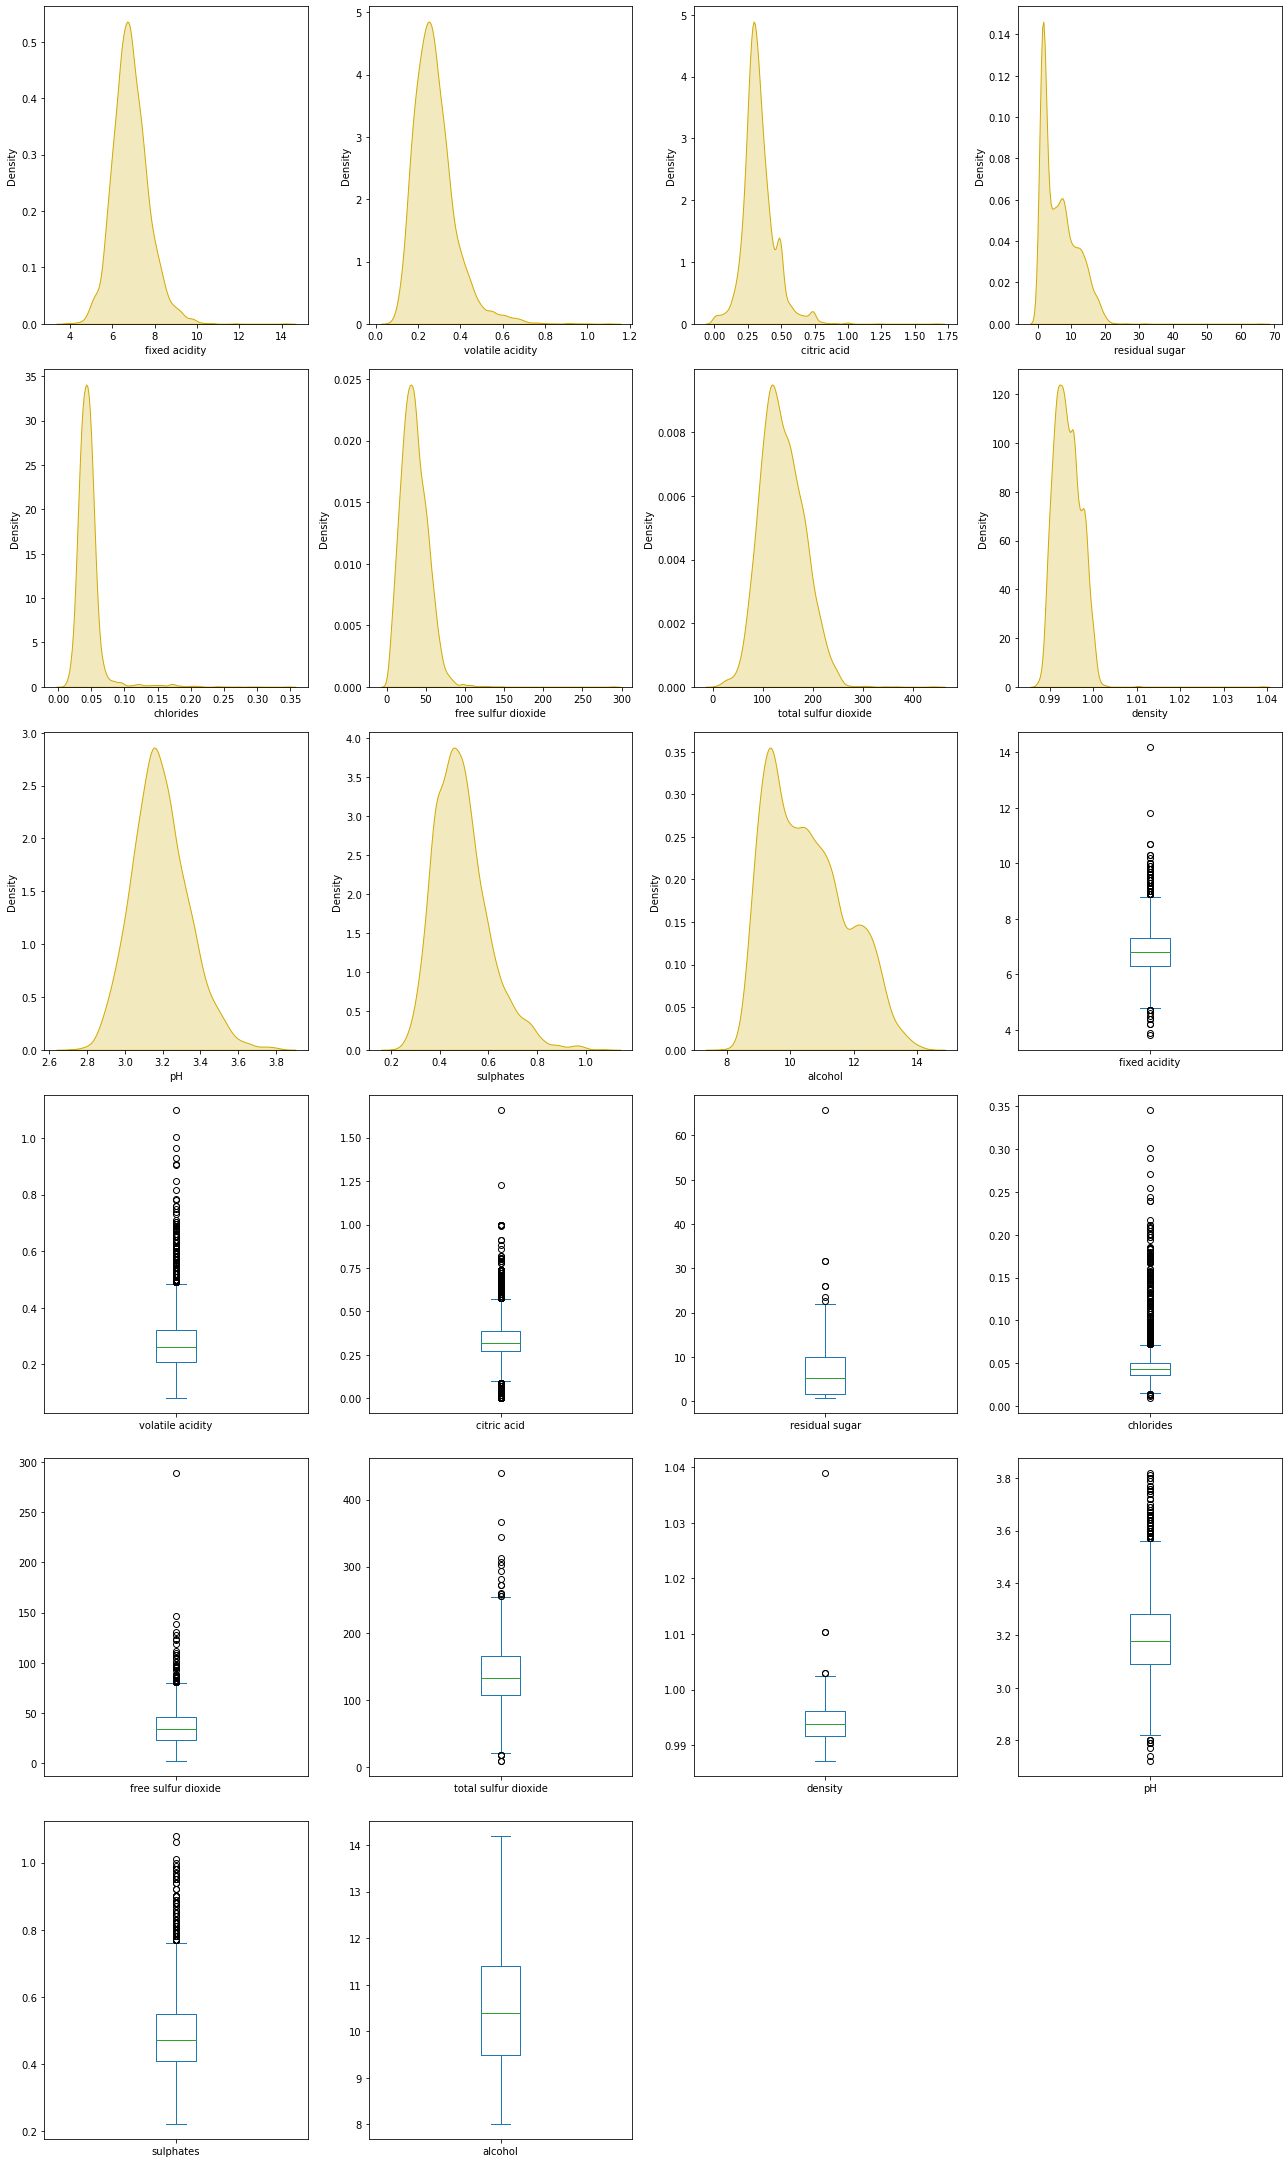

In [21]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='#d1aa00',shade=True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

# Trouvez-vous des données aberrantes ? inhabituelles ?

# On va prendre un raccourci pour avoir la réponse.

# Pour cela on utilise la Skewness et le Kurtosis deux mesures qui permettent d’évaluer la distribution de données. On en parle plus en détail dans cet article dédié au sujet.

# Affichons ces deux mesures pour chacune de nos colonnes caractéristiques :

In [23]:
pd.DataFrame(data=[df[num_columns].skew(),df[num_columns].kurtosis()],index=['skewness','kurtosis'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
skewness,0.647751,1.576980,1.281920,1.077094,5.023331,1.406745,0.390710,0.977773,0.457783,0.977194,0.487342
kurtosis,2.172178,5.091626,6.174901,3.469820,37.564600,11.466342,0.571853,9.793807,0.530775,1.590930,-0.698425


# On remarque une disparité inhabituelle au niveau des chlorides avec un kurtosis de 37 et une skewness de 5, du free sulfur dioxide avec un kurtosis de 11. Les données les plus équilibrées sont le pH et l’alcohol

# On détermine qu’il y a des outliers, des données aux valeurs très éloignées de la moyenne, pour les colonnes chlorides, free sulfur dioxide, density, citric acid et volatile acidity.

# Dans la plupart des distributions, il est normal d’avoir des valeurs extrêmes.

# Analyse Bivariée
# On a maintenant compris la répartition de nos données grâce à l’Analyse Univariée. L’idée maintenant, c’est de poursuivre cette analyse en repérant les possibles liens qui unissent nos données caractéristiques(features) et notre cible(target), la qualité des vins.

# L’Analyse Bivariée est le fait d’inspecter chacun des features en les mettant en relation avec notre target.

# Cela va nous permettre d’émettre des hypothèses sur le dataset.

# On est ici en phase de théorisation.

# La question associée à l’Analyse Bivariée est : Y-a-t-il un lien entre nos features et la target ?

# Par exemple, il pourrait y avoir un lien du type : plus le vin a une densité élevée, moins la qualité est bonne.

# Si le lien est aussi évident, on pourra directement prédire la qualité du vin uniquement en regardant sa densité.

# Mais si les liens sont plus intriqués et moins certains, un modèle de Machine Learning complexe sera nécessaire pour atteindre notre objectif.

# Données numériques
# Graphique en Violon
# On a vu que nos données caractéristiques sont des données numériques et que nos données cible sont des données catégoriques.

# Cela nous facilite la tâche pour mener à bien notre analyse.

# On commence avec l’analyse des sulphates. Y a-t-il un lien entre la quantité de sulfates et la qualité du vin ?

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

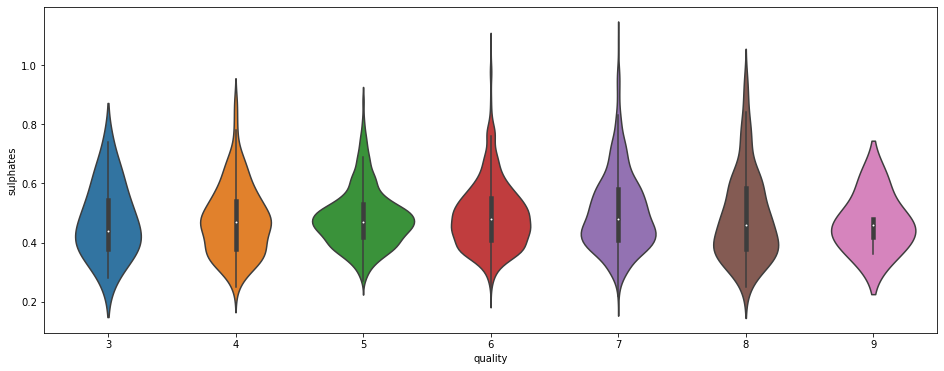

In [26]:
plt.figure(figsize=(16,6))
sns.violinplot(data=df, x='quality', y='sulphates')

# La distribution semble la même pour chacune des qualités de vin. Ici, on veut repérer un pattern qui nous aiderait à prédire la qualité du vin.

# Par exemple, cela aurait été intéressant si on voyait que la moyenne des sulfates augmente selon la qualité du vin. Ici, au contraire, on voit que la moyenne reste la même pour toute les catégories. Il y a quelques données extrêmes pour les qualités 6, 7 et 8. Mais rien de notable ou de vraiment utile pour indiquer une tendance.

# Graphique en Nuage de Points
# Affichons maintenant le total sulfur dioxide en graphique en Nuage de Points (swarmplot) et en fonction de la qualité du vin :

C:\Users\DAMESSE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DAMESSE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DAMESSE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

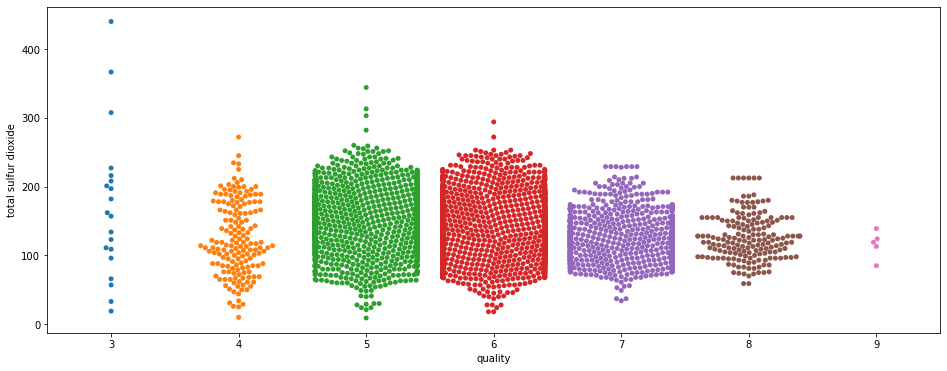

In [29]:
plt.figure(figsize=(16,6))
sns.swarmplot(x="quality", y="total sulfur dioxide", data=df)

# Ici deux choses à remarquer.

# Premièrement on voit qu’il y a beaucoup plus de points sur les données 5, 6 et 7.

# Cela n’est pas une tendance. À l’inverse, cela est un biais de notre dataset.

# Vous vous souvenez que, plus haut, on a vu qu’il y avait plus de données pour les qualités de vin 5, 6 et 7 et beaucoup moins pour les données 3 et 9 ? C’est ce qu’on voit ici et c’est là que l’Analyse Univariée montre son importance car elle permet de repérer les biais au début du projet.

# Effectivement on aurait pu croire que cette distribution anormale est spécifique au feature total sulfur dioxide. En fait cette distribution est partie intégrante de notre dataset, et le biais qu’on a vu dans l’analyse globale se reflète ici dans l’analyse plus détaillée.

# Ensuite, on peut remarquer une tendance : plus la qualité du vin augmente, moins il y a de dioxyde de soufre total.

# La tendance est faible mais elle existe.

# Cependant deux choses à noter :

# elle semble se briser au niveau de la qualité de vin 4
# les données pour 3 et 9 sont très peu nombreuses. Qu’en serait-il si le dataset était completé avec plus de variété de vin 3 et 9 ? Verrait-on la tendance s’annuler ?
# Ces questions resteront sans réponse car le dataset est tel quel. Encore une fois, c’est un phénomène récurrent dans les datasets du monde réel et il est important de savoir les contourner(mais aussi de savoir quand demander au client plus de données).

# Contourner les biais
# Ici je vous propose une technique parmi d’autre pour évaluer ce feature malgré le manque de données.

# Premièrement, on va supposer que la dataset a une répartition représentative du monde réel. C’est-à-dire qu’on suppose que si on rajoutait des milliers de vins à notre dataset, la moyenne de total sulfur dioxide qu’on obtiendrait serait la même que l’on a actuellement.

# Alors, on peut analyser notre moyenne actuelle et considérer que le résultat obtenue sera représentatif du monde réel.

# On calcul la moyenne de total sulfur dioxide pour chaque qualité de vin :

In [32]:
quality_cat = df.quality.unique()
quality_cat.sort()
qual_TSD = []
for i,quality in enumerate(quality_cat):
  qual_TSD.append([quality, df['total sulfur dioxide'].loc[df['quality'] == quality].mean()])

# On obtient 7 lignes, avec pour chacune d’elle la moyenne de total sulfur dioxide correspondant à chacun des niveaux de qualité.

# Au fait, si ton objectif est d'apprendre le Deep Learning - j’ai préparé pour toi le Plan d’action pour Maîtriser les Réseaux de neurones.

# 7 jours de conseils gratuits d’un ingénieur spécialisé en Intelligence Artificielle pour apprendre à maîtriser les réseaux de neurones à partir de zéro :

# Planifie ton apprentissage
# Structure tes projets
# Développe tes algorithmes d’Intelligence Artificielle
# J’ai basé ce programme sur des faits scientifiques, des approches éprouvées par des chercheurs mais également mes propres techniques que j'ai conçues au fil de mes expériences dans le domaine du Deep Learning.

# À présent, on peut revenir à ce que je mentionnais précédemment.

#  Mettons ces données dans un nouveau DataFrame :

In [35]:
df_qual_TSD = pd.DataFrame(qual_TSD, columns =['Quality', 'Mean TSD'])

# Et maintenant analysons les moyennes de total sulfur dioxide pour chaque niveau de qualité :

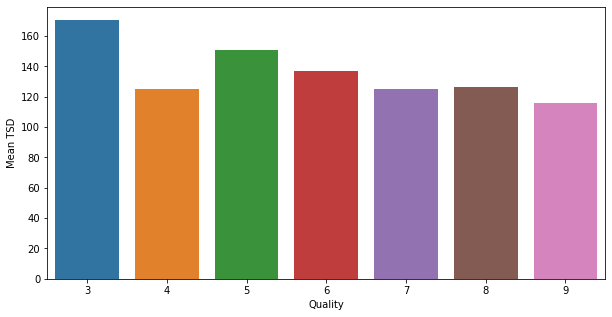

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x="Quality", y="Mean TSD", data=df_qual_TSD)
plt.show()

# La tendance que l’on a remarqué précédemment existe belle et bien dans notre dataset.

# Plus le total sulfur dioxide moyen diminue, plus la qualité du vin augmente, avec une cassure pour la qualité 4.

# Continuons notre Analyse Bivariée !

# Méthode catégorique sur données numérique
# Transformer nos données
# Ici je vous propose une autre approche pour analyser nos données.

# Nos données actuelles sont numériques. C’est à dire qu’on ne peut pas les classer en catégories. Du moins pas directement.

# Ce que je vous propose ici va justement être de transformer nos données numériques en catégories. Cela nous aidera-t-il dans notre analyse ?

# C’est ce qu’on va voir tout de suite !

# Prenons la colonne alcohol qui représente le taux d’alcool de chaque vin.

# Pour transformer cette information en catégorie, on va choisir des valeurs pour les trier.

# On va prendre tous les vins avec un taux d’alcool inférieur à 9.5° et les ranger dans une catégorie Low (taux d’alcool faible). Et on va faire comme cela pour les 4 classes :

# Low (Faible) quand inférieur à 9.5°
# Moderate (Modéré) entre 9.5° et 11°
# High (Haut) entre 11° et 12.5°
# Very High (Très haut) quand supérieur à 12.5°
# Le taux d’alcool pour nos vins commençant à 8° et finissant à 14°, j’ai fait en sorte que chaque classe ait 1.5° de différence. Cette séparation est arbitraire. On aurait pu choisir les quartiles indiqués par la boîte de Tukey dans l’analyse univariée.

In [40]:
def alcohol_cat(alcohol):
    if alcohol <= 9.5:
        return "Low"
    elif alcohol <= 11:
        return "Moderate"
    elif alcohol <= 12.5:
        return "High"
    else:
        return "Very High"

df['alcohol_category'] = df['alcohol'].apply(alcohol_cat)
df.sample(frac=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_category
3199,6.8,0.21,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,7,High
3478,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8,6,Moderate
1273,8.1,0.50,0.47,1.1,0.037,23.0,126.0,0.99380,3.21,0.42,10.9,5,Moderate
2636,7.2,0.24,0.27,11.4,0.034,40.0,174.0,0.99773,3.20,0.44,9.0,5,Low
2745,6.7,0.44,0.22,4.3,0.032,19.0,99.0,0.99015,3.26,0.53,12.8,7,Very High


# Ça y est ! On a notre nouvelle colonne alcohol_category qui représente le taux d’alcool sous forme de données catégoriques.

# Afficher nos données
# Maintenant j’aimerais qu’on mette en relation ces données avec la qualité du vin.

# Pour cela on utilise un Crosstab (objet Pandas) normalisé que l’on affiche en graphique à bar.

<Figure size 1080x2160 with 0 Axes>

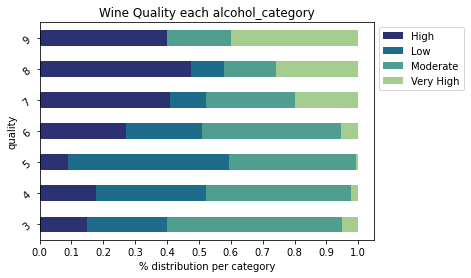

In [43]:
plt.figure(figsize=(15,30))

cross = pd.crosstab(index=df['quality'],columns=df['alcohol_category'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='crest_r').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Wine Quality each {}".format('alcohol_category'))
plt.show()

# Sur ce graphique, on peut voir la catégorie de taux d’alcool qui compose chacune de nos catégories de qualité de vin.

# On remarque qu’il n’y a aucun vin à faible alcool dans les vin de qualité 9.

# En général, on peut remarquer une tendance évidente : plus le taux d’alcool augmente, plus la qualité du vin augmente.

# Cela ne veut pas dire qu’un vin à 14° est forcément bon. Mais plutôt que si vous prenez au hasard un vin à 14°, il y a de forte chance pour que vous tombiez sur un vin de bonne qualité.

# Formule de Pearson & Heatmap
# Dans cette première étape d’Exploratory Data Analysis, on a vu beaucoup de techniques différentes pour analyser nos données.

# Que ce soit pour comprendre et analyser la distribution ou pour détecter les liens entre nos features et notre target.

# Je vous propose un dernier graphique qui plaît beaucoup en entreprise : la heatmap.

# La heatmap est un graphique permettant de repérer directement les liaisons entre nos features et notre target(et plus généralement entre chacune de nos données entre elle) :

<AxesSubplot:>

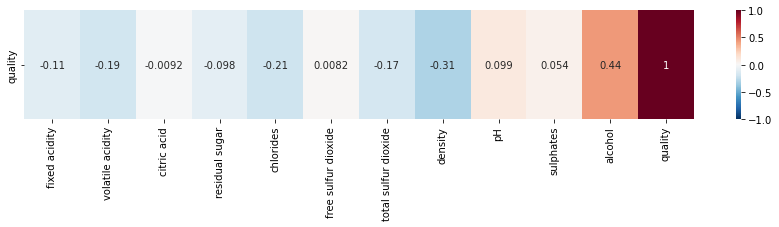

In [46]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr().iloc[[-1]],
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1)

# Plus la valeur est proche de 0, moins il y a de corrélation. Plus on se rapproche de 1, plus la corrélation est positive. Et plus on se rapproche de -1, plus la corrélation est négative.

# Ici, on a seulement affiché la corrélation entre nos features et notre target. Mais vous pouvez afficher la corrélation entre toutes nos données en changeant dans le code df.corr().iloc[[-1]] en df.corr().

# Pour la plupart de nos features, on peut dire que le degré de corrélation est faible.

# On voit que les colonnes les plus corrélées avec quality sont :

# alcohol
# density
# chlorides
# volatile acidity
# Ce type d’information est essentielle pour, plus tard, influer sur la performance de notre modèle de Machine Learning.

# Et en parlant de modèle, on a maintenant assez d’information pour faire du Machine Learning !

#  Deuxième Étape : Machine Learning

#  Deuxième Étape : Machine Learning

#  Deuxième Étape : Machine Learning

# Preparer ses données
# Commençons par préparer nos données.

# On a déjà un DataFrame pour nos features df_features, prenons un DataFrame pour notre cible appelé df_label :

In [52]:
df_label = df['quality']

# Maintenant on sépare nos données en différents ensembles. Un pour l’entrainement, l’autre pour le test.

# L’un va servir à entraîner notre modèle, l’autre à tester ses performances.

# On appelle les features X(caractéristiques) et le label y(cible).

# Cela nous donne quatre ensembles de données :

# X_train
# X_test
# y_train
# y_test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.20)

# On les a séparé de telle sorte à avoir 80% de nos données total en X et 20% en y. On vérifie que les ensembles ont la dimension adéquate :

In [56]:
print((len(X_train), len(y_train)))
print((len(X_test), len(y_test)))

(3918, 3918)
(980, 980)


# Avec ces données on va pouvoir entraîner des modèles de Machine Learning.

# Qu’est-ce qu’un entraînement en Machine Learning ?
# Voilà comment se passe l’entraînement d’un modèle :

# Le modèle de Machine Learning regarde chaque valeur de X_train et y_train
# Il établit une fonction qui permet, avec les valeurs de X_train, de trouver y_train
# On test les performances du modèle en regardant si, à partir de X_test, le modèle réussit à déduire y_test
# Dit autrement, le modèle s’entraîne à déduire la qualité de vin à partir de 80% des bouteilles et de leurs caractéristiques.

# L’entraînement est terminé une fois que le modèle à établit une équation qui relie les bouteilles de vin à leur qualité respective.

# Il peut ensuite tester ses performances sur les 20% bouteilles restantes.

# Son objectif est de trouver une fonction qui marche à la fois pour les données d’entraînement mais aussi pour les données de test.

# Toute la difficulté réside ici.

# Si les données d’entraînement représente le monde réel alors le modèle sera performant.

# Au contraire, si les données ne représente pas la diversité des vins alors il aura plus de mal à prédire les données test.

# Effectivement si le modèle ne voit jamais de vin de qualité 9 pendant l’entraînement, lors du test de performance, s’il tombe face à une bouteille de qualité 9, il ne pourra pas la classifier de la bonne manière.

# C’est là toute l’importance de l’Analyse Univariée qui nous permet de comprendre les biais inerrant à notre dataset et donc les éventuels obstacles auxquels on fera face.

# Mais sans plus tarder, passons à la pratique et faisons ENFIN du Machine Learning !

# Modèles de Machine Learning
# Cet article est pensé pour débutants dans le Machine Learning. Partons donc du principe qu’on ne sait pas quel modèle utiliser.

# Nous avons une seule information : nous devons prédire des catégories, des niveaux de qualité de vin.

# C’est donc un exercice de classification.

# On va donc utiliser chaque modèle de classification, les comprendre et évaluer leurs performances.

# Logistic Regression
# La Logistic Regression (régression logistique) est un modèle permettant de déduire une variable catégorique à partir de données caractéristiques.

# Le modèle de Machine Learning de régression analyse nos données l’une après l’autre pour établir une règle simple permettant d’établir la catégorie à laquelle appartient chaque vin.

# En terme mathématique, la Logistique Regression construit une fonction lui permettant, à partir de données caractéristiques, de calculer la probabilité d’appartenir à chacune des classes.

In [59]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

C:\Users\DAMESSE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Et le score obtenu :

In [61]:
logisticRegression.score(X_test, y_test)

0.47959183673469385

# Sortie : 0.47

# On a une précision de 47% ce qui est peu.

# Voyons comment il se débrouille pour prédire la catégorie du premier vin de notre dataset.

# On utilise la fonction predict_proba() qui nous permet d’afficher la probabilité du vin en question d’appartenir à chaque niveau de qualité de vin:

In [ ]:
logisticRegression.predict_proba(X_test.iloc[:1])

# Ici la probabilité la plus forte est pour la classe 6.

# Notre modèle prédit que le vin est de qualité 6.

# Mais quel est le bon résultat ?

In [63]:
y_test.iloc[:1]

2232    6
Name: quality, dtype: int64

# Support Vector Machines
# Le Support Vector Machines est un algorithme de Machine Learning à hautes performances.

# Le SVM dessine un espace vide (imaginons un espace 2D avec abscisse et ordonnée). Ensuite il regarde chaque ligne de notre dataset et lui donne une position dans l’espace en fonction de ses caractéristiques (X) mais aussi de la catégorie (y) auquel il appartient.

# Lorsque une ligne appartient à une nouvelle catégorie (une qualité de vin différente), il projette ce point de manière à maximiser la distance entre cette catégorie et les autres.

# Le modèle recommence cette opération jusqu’à obtenir un espace complet appelé SVM map.
# Pour prédire, le SVM prend simplement les nouvelles données et en fonction des caractéristiques positionne ce point sur l’espace. Sa position donnera alors la catégorie à laquelle il appartient.

# Le SVM en pratique :

In [64]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [65]:
SVM.score(X_test, y_test)

0.45510204081632655

# Même précision qu’avec la Régression Logistique. On continue !

# Stochastic Gradient Descent
# Si vous avez compris comment fonctionne le SVM, vous comprendrez facilement le Stochastic Gradient Descent (Algorithme du gradient stochastique).

# Le SVM consiste à prendre des points et les projeter sur un espace, un plan, de manière à maximiser la distance entre les différentes catégories.

# En terme mathématique, on appelle ça trouver l’optimal d’une fonction.

# Et le Stochastic Gradient Descent (SGD) est en fait un optimiseur qui permet d’améliorer les algorithmes (ou fonctions) tel que le SVM, la Logistic Regression, etc.

# Ce même optimiseur est utilisé dans les Réseaux de Neurones. Cela fait de SGD un des concepts fondamental en Machine Learning.

# Utilisons-le dès maintenant, par défaut il optimise un SVM :

In [66]:
SGD = SGDClassifier()
SGD.fit(X_train, y_train)

SGDClassifier()

In [67]:
SGD.score(X_test, y_test)

0.4377551020408163

# Ça ne semble toujours pas convenir pour notre dataset. Passons à la suite !

# Naive Bayes
# L’algorithme Naive Bayes se fonde sur le Théorème de Bayes.

# En langage non-mathématique le Théorème considère que nos caractéristiques sont en lien avec notre target, et que l’on peut tracer une fonction qui les relie entre elles.

# Le principe est le même que pour la plupart des Algorithmes de Classification. La différence réside dans la fonction utilisée pour établir les liens entre nos données.

# On ajoute une approche naïve à ce théorème(d’où le nom Naive Bayes), c’est à dire qu’on considère que les caractéristiques sont indépendantes.

# Par exemple, ici nous avons deux caractéristiques fixed acidity et volatile acidity. On peut considérer que ces deux caractéristiques sont corrélées car elles mesurent toutes deux un taux d’acidité. Eh bien même si elles sont corrélées, le Naive Bayes supposera qu’elles sont indépendantes lors de son analyse.

# Cette approche peut sembler contre-intuitive mais sur certains datasets, le Naive Bayes fait des miracles !

# Le Naive Bayes en action :

In [68]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [69]:
GNB.score(X_test, y_test)

0.4193877551020408

# Decision Tree
# Le Decision Tree (ou Arbre de Décision) est l’un des algorithmes les plus utilisés et le plus simple à comprendre !

# Il émet des hypothèses sous formes d’arbres. Chaque noeud de l’arbre représente une hypothèse sur une caractéristique.


# Decision Tree – source
# L’arbre peut avoir une longueur immense et tester plusieurs caractéristiques de manière différente.

# Voilà comment utiliser le Decision Tree :

In [70]:
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
decisionTree.score(X_test, y_test)

0.5816326530612245

# On a enfin réussi à avoir un score plutôt bon!

# Comme vous pouvez le voir, ce n’est pas toujours évident de trouver la bon modèle pour notre dataset!

# Une dernière chose sur le Decision Tree : vous pouvez afficher de manière simple l’arbre grâce à la librairie GraphViz.

# Cet arbre est essentiel pour comprendre comment notre Algorithme de Machine Learning fait ses choix. C’est une des caractéristiques qui le rend indispensable aux yeux des Data Scientists et Machine Learning Engineers !